## Python statistics essential training - 02_04_cleaning

Standard imports

In [9]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('billboard.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa1 in position 2: invalid start byte

In [4]:
# the csv file was not saved as UTF-8 encoding so we have to change the 
# encoding type to match that of the file
df = pd.read_csv('billboard.csv',encoding='latin-1')

In [5]:
df

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


year                 0
artist.inverted      0
track                0
time                 0
genre                0
                  ... 
x72nd.week         317
x73rd.week         317
x74th.week         317
x75th.week         317
x76th.week         317
Length: 83, dtype: int64

In [7]:
df.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

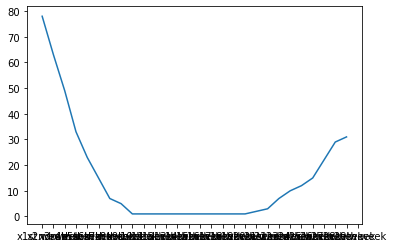

In [10]:
# plot the evolution of the ranking for any given song
# in this case were looking at the first song from week 1 to week 76
plt.plot(df.loc[0,'x1st.week':'x76th.week'])

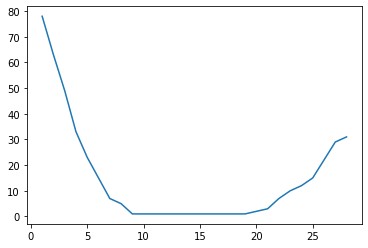

In [11]:
# telling plot explicitly to use a range from 1 to 76
plt.plot(range(1,77),df.loc[0,'x1st.week':'x76th.week'])

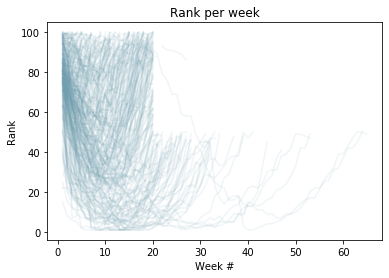

In [20]:
# plotting several songs at once

# iterate over the index and rows
for index, row in df.iterrows():
    # for each row, plot its ranking per week on the billboard. alpha to add transparency
    plt.plot(range(1,77),row['x1st.week':'x76th.week'], color = '#709fb0', alpha=.1)
    plt.xlabel('Week #')
    plt.ylabel('Rank')
    plt.title("Rank per week")

# [melting](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)
The rankings are not very useable for analysis because their rankings are divided over multiple columns. It would make more sense to have each ranking in a seperate row with the week number as a variable. This is called [melting](https://www.geeksforgeeks.org/python-pandas-melt/) where we melt each row into multiple rows, each of which represent a single ranking.


In [22]:
# select a subset of the columns
dfshort = df[['artist.inverted','track','time','date.entered','x1st.week','x2nd.week','x3rd.week']]

In [24]:
dfshort.head()

,artist.inverted,track,time,date.entered,x1st.week,x2nd.week,x3rd.week
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [25]:
# rename the columns to something simpler to understand
dfshort.columns = ['artist','track','time','date_entered','wk1','wk2','wk3']

In [26]:
dfshort.head()

,artist,track,time,date_entered,wk1,wk2,wk3
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [35]:
# Melting

# since were melting using the name of the df instead of pd.melt()
# the first requirement is to specify the columns that we want to use 
# as observation variables 

# the next requirement are the rows that should be used as the values. 
# in this case its the wk# because we want to see the rank of each song
# per week it was on the billboard

# next is the name of the column that tells you which wk# it is.

# lastly the we set the name of the column that holds the ranks of the song
# for that week on the billboard

melted  = dfshort.melt(['artist','track','time','date_entered'],['wk1','wk2','wk3'],'week','rank')
melted.head(10)

,artist,track,time,date_entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,wk1,71.0
3,Madonna,Music,3:45,2000-08-12,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,wk1,57.0
5,Janet,Doesn't Really Matter,4:17,2000-06-17,wk1,59.0
6,Destiny's Child,Say My Name,4:31,1999-12-25,wk1,83.0
7,"Iglesias, Enrique",Be With You,3:36,2000-04-01,wk1,63.0
8,Sisqo,Incomplete,3:52,2000-06-24,wk1,77.0
9,Lonestar,Amazed,4:25,1999-06-05,wk1,81.0


In [36]:
# we can look at specific songs by querying the melted table
melted.query('track == "Liar"')

,artist,track,time,date_entered,week,rank
66,Profyle,Liar,3:57,2000-09-16,wk1,52.0
383,Profyle,Liar,3:57,2000-09-16,wk2,32.0
700,Profyle,Liar,3:57,2000-09-16,wk3,25.0


In [37]:
# lets change the week column to contain numbers instead of strings
melted['week'] = melted['week'].apply(lambda x: int(x[2]))
melted.head(10)

,artist,track,time,date_entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0
3,Madonna,Music,3:45,2000-08-12,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,1,57.0
5,Janet,Doesn't Really Matter,4:17,2000-06-17,1,59.0
6,Destiny's Child,Say My Name,4:31,1999-12-25,1,83.0
7,"Iglesias, Enrique",Be With You,3:36,2000-04-01,1,63.0
8,Sisqo,Incomplete,3:52,2000-06-24,1,77.0
9,Lonestar,Amazed,4:25,1999-06-05,1,81.0


# [Time Deltas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html)
Timedeltas are differences in times, expressed in difference units, e.g. days, hours, minutes, seconds. They can be both positive and negative.

Here we are going to create a new variable called date that contains the time elapsed from when the song was entered to the current date at each week that its on the billboard. Basically updating the date entered variable per week. 

### For Example

__Before__

     artist	track	time	date_entered	week   rank
    Profyle	Liar	3:57	2000-09-16	    wk1	   52.0
    Profyle	Liar	3:57	2000-09-16	    wk2	   32.0
    Profyle	Liar	3:57	2000-09-16	    wk3	   25.0
-----------------------------------------------------------------
__After__

    artist	track	time	date	       week	     rank
    Profyle	Liar	3:57	2000-09-16	    wk1	    52.0
    Profyle	Liar	3:57	2000-09-23	    wk2	    32.0
    Profyle	Liar	3:57	2000-09-30	    wk3	    25.0
    
The formula for this is given by

$y$ = $x$ + ($t$ * ($w$ - 1))

Where
* y = new date
* x = date entered
* t = time elapsed (in days)
* w = week number

2000-09-23 = 2000-09-16 + (7*(2-1))

In [39]:
# converting dates into datetime objects
melted['date_entered'] = pd.to_datetime(melted['date_entered'])

In [45]:
melted['date'] = melted['date_entered'] + pd.Timedelta('7 days') * (melted['week'] - 1)
# now we can drop the date entered column
melted.drop(['date_entered'],axis = 1,inplace = True)

In [46]:
melted.query('track == "Liar"')

,artist,track,time,week,rank,date
66,Profyle,Liar,3:57,1,52.0,2000-09-16
383,Profyle,Liar,3:57,2,32.0,2000-09-23
700,Profyle,Liar,3:57,3,25.0,2000-09-30


In [47]:
melted.head()

,artist,track,time,week,rank,date
0,Destiny's Child,Independent Women Part I,3:38,1,78.0,2000-09-23
1,Santana,"Maria, Maria",4:18,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,4:07,1,71.0,1999-10-23
3,Madonna,Music,3:45,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,1,57.0,2000-08-05


In [48]:
# now well sort the melted table into 'tidy' format
# with the values sorted by artist and track
final = melted[['artist','track','time','date','week','rank']]
final.sort_values(['artist','track'],inplace = True)

In [49]:
final.head()

,artist,track,time,date,week,rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
604,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0
